# 📊 Exploratory Data Analysis on Drugs, Side Effects, and Medical Conditions

This project explores relationships between drugs, their side effects, medical conditions, and user reviews.

## Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load DataSet

In [3]:
# Replace with your actual file path
df = pd.read_csv('drugs_side_effects_drugs_com.csv')
df.head()

,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",87%,Rx,D,N,X,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760.0,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html
1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...","Aldactone, CaroSpir",82%,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449.0,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html
2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,"Dynacin, Minocin, Minolira, Solodyn, Ximino, V...",48%,Rx,D,N,NaN,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482.0,https://www.drugs.com/minocycline.html,https://www.drugs.com/condition/acne.html
3,Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",NaN,41%,Rx,X,N,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,623.0,https://www.drugs.com/accutane.html,https://www.drugs.com/condition/acne.html
4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives","Cleocin T, Clindacin ETZ, Clindacin P, Clindag...",39%,Rx,B,N,NaN,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146.0,https://www.drugs.com/mtm/clindamycin-topical....,https://www.drugs.com/condition/acne.html


## 🧹 Data Cleaning

In [4]:
# Check for missing values
df.isnull().sum()

drug_name                           0
medical_condition                   0
side_effects                      124
generic_name                       43
drug_classes                       82
brand_names                      1213
activity                            0
rx_otc                              1
pregnancy_category                229
csa                                 0
alcohol                          1554
related_drugs                    1469
medical_condition_description       0
rating                           1345
no_of_reviews                    1345
drug_link                           0
medical_condition_url               0
dtype: int64

In [5]:
# Option 1: Drop missing values
df_cleaned = df.dropna()

# Option 2: Fill missing values
df_filled = df.fillna('Unknown')

## 🔍 Basic Data Exploration

In [6]:
df.describe(include='all')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   drug_name                      2931 non-null   object 
 1   medical_condition              2931 non-null   object 
 2   side_effects                   2807 non-null   object 
 3   generic_name                   2888 non-null   object 
 4   drug_classes                   2849 non-null   object 
 5   brand_names                    1718 non-null   object 
 6   activity                       2931 non-null   object 
 7   rx_otc                         2930 non-null   object 
 8   pregnancy_category             2702 non-null   object 
 9   csa                            2931 non-null   object 
 10  alcohol                        1377 non-null   object 
 11  related_drugs                  1462 non-null   object 
 12  medical_condition_description  2931 non-null   o

## 📈 Univariate Analysis

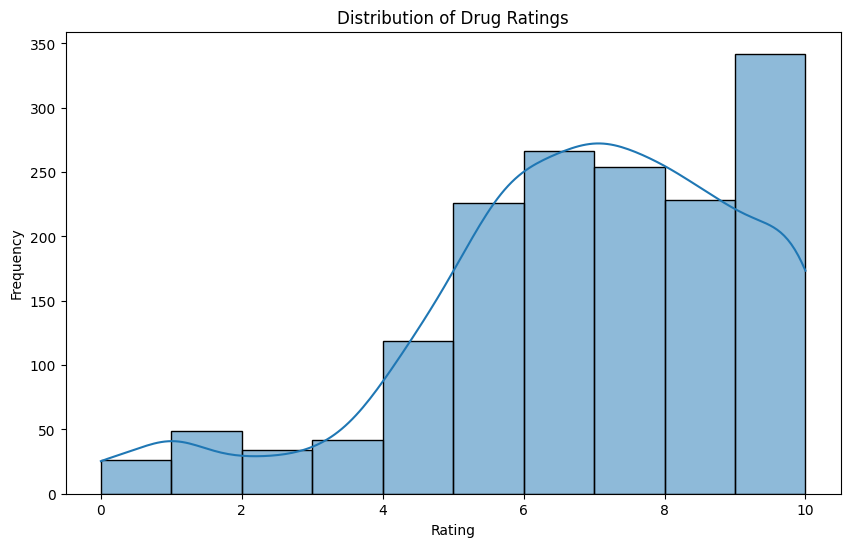

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=10, kde=True)
plt.title('Distribution of Drug Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

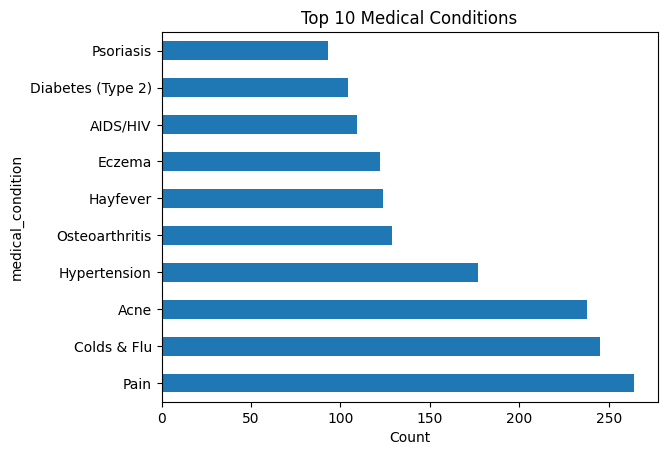

In [8]:
df['medical_condition'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 Medical Conditions')
plt.xlabel('Count')
plt.show()

## 🔗 Bivariate and Multivariate Analysis

In [9]:
# Top Drugs by Condition
top_drugs = df.groupby('medical_condition')['drug_name'].value_counts().groupby(level=0).head(1)
print(top_drugs)

medical_condition     drug_name                       
ADHD                  Adderall                            1
AIDS/HIV              AccessPak for HIV PEP Basic         1
Acne                  minocycline                         2
Allergies             Acthar                              1
Alzheimer's           Adlarity                            1
Angina                Angiomax                            1
Anxiety               Alprazolam Intensol                 1
Asthma                Alvesco                             1
Bipolar Disorder      Abilify                             1
Bronchitis            Altarussin                          1
COPD                  Anoro Ellipta                       1
Cancer                Cosmegen                            1
Cholesterol           Altocor                             1
Colds & Flu           A-Phedrin                           1
Constipation          Bisa-Lax                            1
Covid 19              Actemra                

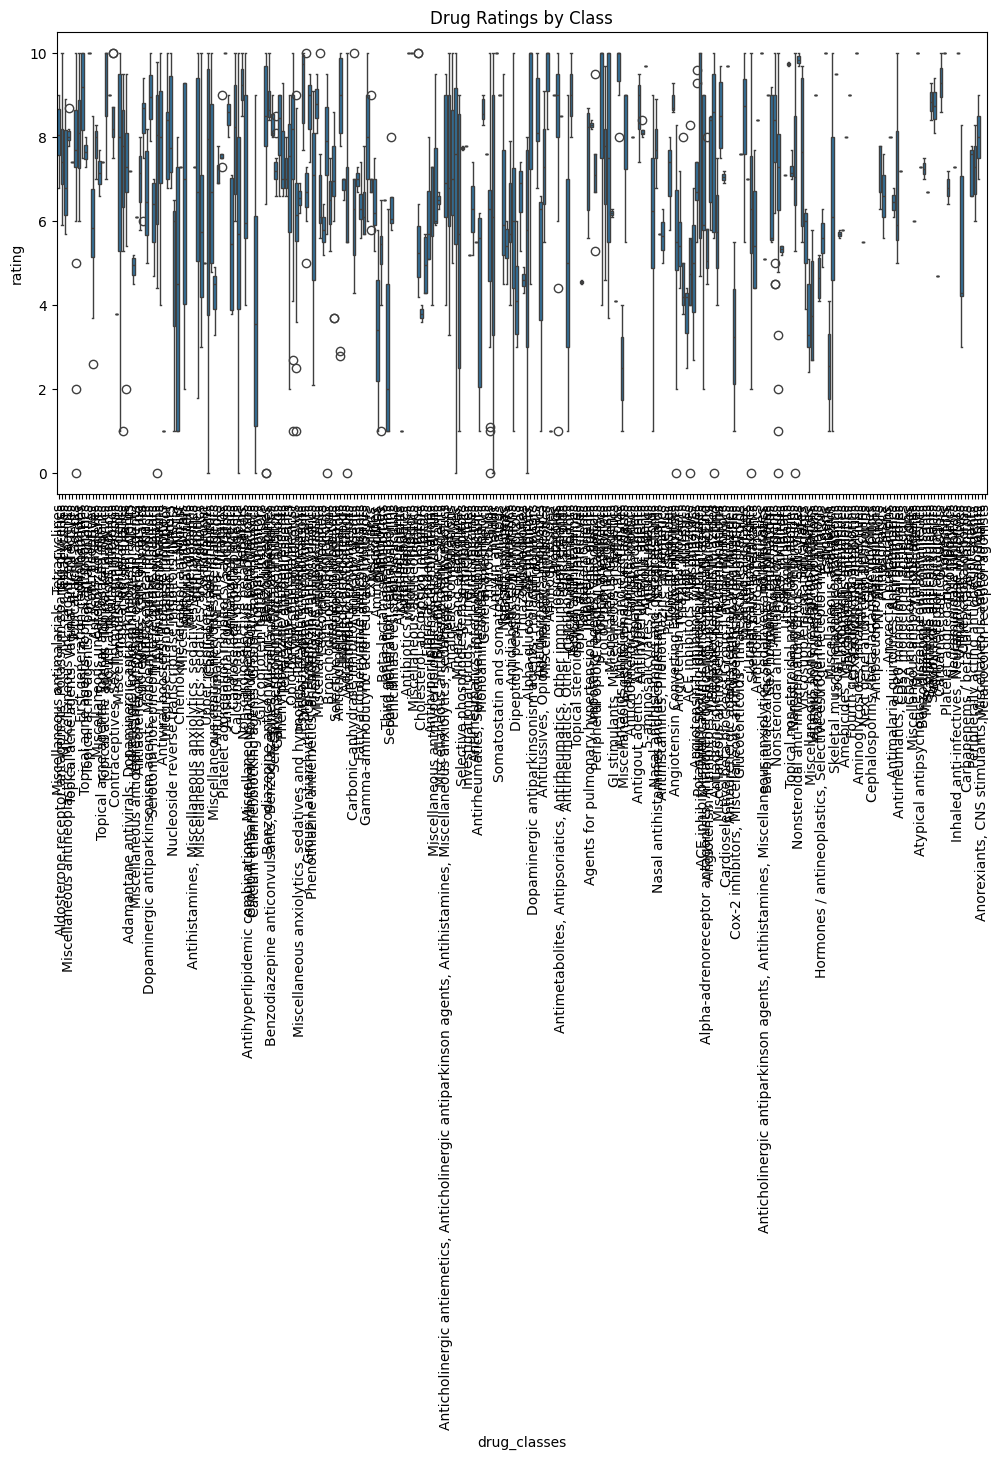

In [10]:
# Ratings by Drug Class
plt.figure(figsize=(12, 6))
sns.boxplot(x='drug_classes', y='rating', data=df)
plt.xticks(rotation=90)
plt.title('Drug Ratings by Class')
plt.show()

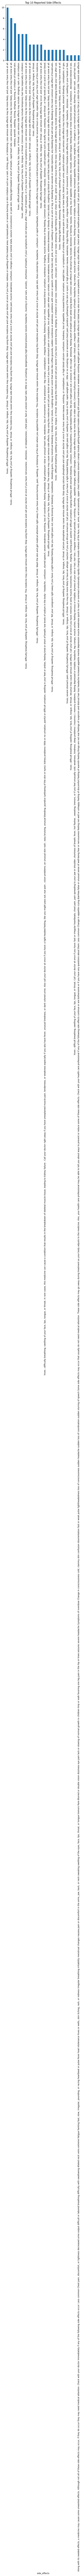

In [12]:
# Most Common Side Effects
df['side_effects'].value_counts().head(20).plot(kind='bar')
plt.title('Top 10 Reported Side Effects')
plt.show()

## 🔬 Optional: Advanced Analysis

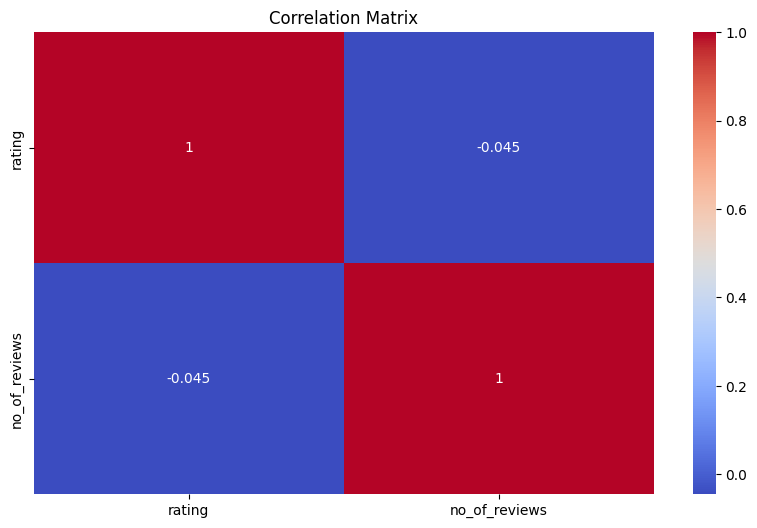

In [13]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## 📌 Summary of Findings
- Key patterns observed.
- Conditions with most drugs.
- Common side effects.
- Drug class-wise rating differences.